In [1]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Store filepath in a variable
file = Path("Resources/NewYorkAirBnB.csv")
file_df = pd.read_csv(file)
file_df.head()

,id,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,...,bedrooms,beds,price,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,8.017500e+17,495455523,Michael,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,...,1.0,1.0,$143.00,0,NaN,NaN,NaN,NaN,NaN,NaN
1,7.659490e+17,488760226,Eric,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,...,1.0,1.0,$30.00,13,4.77,4.77,4.85,4.92,4.85,4.92
2,6.362740e+17,461263600,Tommaso,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,...,2.0,2.0,$157.00,0,NaN,NaN,NaN,NaN,NaN,NaN
3,7.681250e+17,475699129,Suliman,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,2,...,3.0,1.0,$89.00,15,5.00,4.87,5.00,5.00,5.00,5.00
4,4.924826e+07,397288055,Katherine,North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,3,...,2.0,2.0,$125.00,25,4.56,4.44,4.72,4.88,4.72,4.64


In [3]:
# Copy and clean initial df for size comparisons
size_df = file_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "bathrooms_text",
                   "bedrooms", "beds", "price", "number_of_reviews", "review_scores_rating"]].copy()

# Split bathroom data to enable use as int, get rid of extra columns
size_df[["baths", "shared", "bath"]] = size_df.bathrooms_text.str.split(" ", expand=True)
size_df["baths"] = size_df["baths"].replace("Half-bath", "0.5")
size_df["baths"] = size_df["baths"].replace("Private", "0.5")
size_df["baths"] = size_df["baths"].replace("Shared", "0.5")

size_df["baths"] = size_df["baths"].astype(float)
size_df = size_df[["id", "host_id", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "baths", "bedrooms",
                   "beds", "price", "number_of_reviews", "review_scores_rating"]]

size_df.columns = ["ID", "Host ID", "Neighborhood", "Borough", "Property Type", "Room Type", "Capacity", "Baths", "Bedrooms",
                        "Beds", "Price", "Number of Reviews", "Overall Review Score"]
size_df

KeyError: "['review_scores_rating'] not in index"

In [4]:
#Count how many reservations were made in each borough
file_df['neighbourhood_group_cleansed'].value_counts()

Manhattan        17658
Brooklyn         16237
Queens            6916
Bronx             1691
Staten Island      429
Name: neighbourhood_group_cleansed, dtype: int64

In [14]:
file_df['price'] = file_df['price'].replace("[$,]", "", regex=True).astype(float)
file_df.groupby('neighbourhood_group_cleansed')['price'].mean()

neighbourhood_group_cleansed
Bronx            117.512123
Brooklyn         162.766829
Manhattan        268.365783
Queens           128.173655
Staten Island    309.037296
Name: price, dtype: float64

<Axes: xlabel='neighbourhood_group_cleansed'>

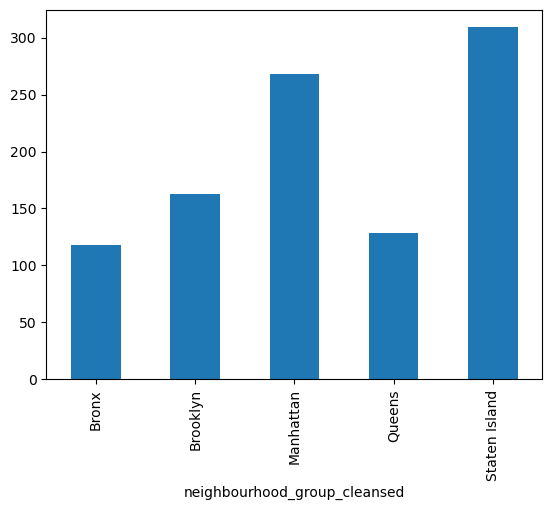

In [15]:
avg_price = file_df.groupby('neighbourhood_group_cleansed')['price'].mean()
avg_price.plot(kind='bar')